# Analytics Practicum I - Assignment 1

## Weather in Athens

> Konstantinos Ninas, f2822108 <br />
> MSc in Business Analytics <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> f2822108@aueb.gr

In [434]:
#import of libraries
import pandas as pd
import datetime as dt
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import calendar
from collections import Counter

%matplotlib inline

In [435]:
filename = '2864555.csv'

In [436]:
weather = pd.read_csv(filename, parse_dates=['DATE'])
weather.head(5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-01,0.00,",,E",NaN,NaN,65.0,",,E",50.0,",,E"
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-02,0.08,",,E",NaN,NaN,58.0,",,E",45.0,",,E"
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-03,0.00,",,E",NaN,NaN,60.0,",,E",49.0,",,E"
3,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-04,0.00,",,E",NaN,NaN,66.0,",,E",45.0,",,E"
4,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-05,0.00,",,E",NaN,NaN,64.0,",,E",47.0,",,E"


The variables PRCP_ATTRIBUTES, TAVG_ATTRIBUTES, TMAX_ATTRIBUTES and TMIN_ATTRIBUTES can be dropped since they don't seem usefull for this analysis

In [437]:
weather = weather.drop(['TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'PRCP_ATTRIBUTES'], axis = 1)
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-01,0.00,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-02,0.08,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-03,0.00,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-04,0.00,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",37.9,23.75,10,1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",37.9,23.75,10,2020-12-27,0.00,62.0,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",37.9,23.75,10,2020-12-28,0.26,59.0,65.0,53.0
23248,GR000016716,"HELLINIKON, GR",37.9,23.75,10,2020-12-29,0.00,61.0,68.0,54.0
23249,GR000016716,"HELLINIKON, GR",37.9,23.75,10,2020-12-30,0.00,62.0,68.0,59.0


In [438]:
round(weather.describe(),2)

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
count,23251.0,23251.00,23251.0,22773.00,20940.00,22307.00,22418.00
mean,37.9,23.75,10.0,0.04,64.88,72.23,58.05
std,0.0,0.00,0.0,0.18,12.47,13.31,11.63
min,37.9,23.75,10.0,0.00,28.00,34.00,24.00
25%,37.9,23.75,10.0,0.00,55.00,62.00,49.00
50%,37.9,23.75,10.0,0.00,64.00,71.00,58.00
75%,37.9,23.75,10.0,0.00,76.00,84.00,68.00
max,37.9,23.75,10.0,5.59,95.00,108.00,87.00


The below can be observed:
* As expected, the coordinates (latitude, longitude, elevation) are the same for all the observations - so it's ok to remove them since they do not seem to have any issues, and they do not offer any additional information
* The same goes with the Station code and name, so they are also removed
* All the temperatures are in Fahrenheit, they are updated to Celsius
* No extreme values are observed in any numeric variable (precipitation and temperatures)

In [439]:
weather = weather.drop(['LATITUDE', 'LONGITUDE', 'ELEVATION', 'STATION','NAME'], axis = 1)
weather

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,65.0,50.0
1,1955-01-02,0.08,NaN,58.0,45.0
2,1955-01-03,0.00,NaN,60.0,49.0
3,1955-01-04,0.00,NaN,66.0,45.0
4,1955-01-05,0.00,NaN,64.0,47.0
...,...,...,...,...,...
23246,2020-12-27,0.00,62.0,NaN,NaN
23247,2020-12-28,0.26,59.0,65.0,53.0
23248,2020-12-29,0.00,61.0,68.0,54.0
23249,2020-12-30,0.00,62.0,68.0,59.0


In [440]:
#convert all temperatures to Celsius
weather.TAVG = round((weather.TAVG - 32)*(5/9),2)
weather.TMAX = round((weather.TMAX - 32)*(5/9),2)
weather.TMIN = round((weather.TMIN - 32)*(5/9),2)
round(weather.describe(),2)

,PRCP,TAVG,TMAX,TMIN
count,22773.00,20940.00,22307.00,22418.00
mean,0.04,18.27,22.35,14.47
std,0.18,6.93,7.39,6.46
min,0.00,-2.22,1.11,-4.44
25%,0.00,12.78,16.67,9.44
50%,0.00,17.78,21.67,14.44
75%,0.00,24.44,28.89,20.00
max,5.59,35.00,42.22,30.56


It is noticed that some average temperature values are null, while the max and min temperatures are recorded for the same day the values will be calculated by the mean of the min and max values

In [441]:
#find all days that don't have an average daily temperature but have a max and a min, and calculate their mean
weather.loc[np.isnan(weather.TAVG) & ((np.isnan(weather.TMAX) == False) & (np.isnan(weather.TMIN) == False))] 

,DATE,PRCP,TAVG,TMAX,TMIN
0,1955-01-01,0.00,NaN,18.33,10.00
1,1955-01-02,0.08,NaN,14.44,7.22
2,1955-01-03,0.00,NaN,15.56,9.44
3,1955-01-04,0.00,NaN,18.89,7.22
4,1955-01-05,0.00,NaN,17.78,8.33
...,...,...,...,...,...
7166,1974-08-15,0.00,NaN,30.56,21.67
7167,1974-08-16,0.00,NaN,31.67,22.78
7455,1975-05-31,0.00,NaN,29.44,21.67
7958,1976-10-15,0.00,NaN,23.89,17.78


In [442]:
weather.loc[np.isnan(weather.TAVG) & ((np.isnan(weather.TMAX) == False) & (np.isnan(weather.TMIN) == False)),'TAVG'] = (weather.TMAX + weather.TMIN)/2
weather.loc[np.isnan(weather.TAVG) & ((np.isnan(weather.TMAX) == False) & (np.isnan(weather.TMIN) == False)),'TAVG']

Series([], Name: TAVG, dtype: float64)

There is one observation (of the day 09/03/1957) that has no average temperature. It also does not have a min temperature, so is average daily temperature cannot be calculated. Although, it has has a value for rainfall, so it won't be removed from the datase

In [443]:
weather.loc[np.isnan(weather.TAVG)]

,DATE,PRCP,TAVG,TMAX,TMIN
798,1957-03-09,0.01,NaN,16.67,NaN


The same calculation is applies for max and min temperatures

In [444]:
weather.loc[np.isnan(weather.TMAX) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMIN) == False))] 

,DATE,PRCP,TAVG,TMAX,TMIN
18286,2005-01-24,NaN,10.00,NaN,2.78
18370,2005-04-18,NaN,15.00,NaN,10.56
18395,2005-05-13,NaN,21.67,NaN,16.67
18440,2005-06-27,NaN,28.33,NaN,23.89
18589,2005-11-23,0.86,12.78,NaN,8.33
...,...,...,...,...,...
23205,2020-11-16,0.00,16.11,NaN,12.22
23218,2020-11-29,NaN,16.11,NaN,13.89
23221,2020-12-02,0.00,13.33,NaN,10.56
23232,2020-12-13,0.35,14.44,NaN,12.22


In [445]:
weather.loc[np.isnan(weather.TMAX) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMIN) == False)),'TMAX'] = (weather.TAVG*2) - weather.TMIN
weather.loc[np.isnan(weather.TMAX) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMIN) == False)),'TMAX']

Series([], Name: TMAX, dtype: float64)

In [446]:
weather.loc[np.isnan(weather.TMIN) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMAX) == False))]

,DATE,PRCP,TAVG,TMAX,TMIN
4119,1966-04-12,0.00,17.78,22.22,NaN
4335,1966-11-14,0.00,17.22,19.44,NaN
18270,2005-01-08,0.00,10.00,12.78,NaN
18277,2005-01-15,0.00,8.33,10.56,NaN
18278,2005-01-16,0.20,6.67,7.78,NaN
...,...,...,...,...,...
23215,2020-11-26,0.00,13.33,17.22,NaN
23222,2020-12-03,NaN,13.89,17.22,NaN
23223,2020-12-04,0.22,14.44,17.22,NaN
23226,2020-12-07,NaN,15.56,18.33,NaN


In [447]:
weather.loc[np.isnan(weather.TMIN) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMAX) == False)),'TMIN'] = (weather.TAVG*2) - weather.TMAX
weather.loc[np.isnan(weather.TMIN) & ((np.isnan(weather.TAVG) == False) & (np.isnan(weather.TMAX) == False)),'TMIN']

Series([], Name: TMIN, dtype: float64)

Then, the precipitation's unit of measure will be converted to inches from mm

In [448]:
weather.PRCP = weather.PRCP*25.4
weather.PRCP

0        0.000
1        2.032
2        0.000
3        0.000
4        0.000
         ...  
23246    0.000
23247    6.604
23248    0.000
23249    0.000
23250    0.000
Name: PRCP, Length: 23251, dtype: float64

* Next, the missing dates in the interval of 01/01/2010-31/12/2019 will be located
* The date will be set as an index and will be converted to date type, then, through the datediff function all the missing dates will be found

In [449]:
weather = weather.set_index('DATE')
weather

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.000,14.165,18.33,10.00
1955-01-02,2.032,10.830,14.44,7.22
1955-01-03,0.000,12.500,15.56,9.44
1955-01-04,0.000,13.055,18.89,7.22
1955-01-05,0.000,13.055,17.78,8.33
...,...,...,...,...
2020-12-27,0.000,16.670,NaN,NaN
2020-12-28,6.604,15.000,18.33,11.67
2020-12-29,0.000,16.110,20.00,12.22


In [450]:
weather.index = pd.to_datetime(weather.index)
weather

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.000,14.165,18.33,10.00
1955-01-02,2.032,10.830,14.44,7.22
1955-01-03,0.000,12.500,15.56,9.44
1955-01-04,0.000,13.055,18.89,7.22
1955-01-05,0.000,13.055,17.78,8.33
...,...,...,...,...
2020-12-27,0.000,16.670,NaN,NaN
2020-12-28,6.604,15.000,18.33,11.67
2020-12-29,0.000,16.110,20.00,12.22


There are 853 missing days in the 10-year interval

In [451]:
missing_dates = pd.date_range(start="2010-01-01", end="2019-12-31").difference(weather.index)
missing_dates

DatetimeIndex(['2012-05-26', '2012-05-27', '2012-05-28', '2012-05-31',
               '2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06',
               ...
               '2017-09-10', '2017-09-20', '2017-09-21', '2017-09-23',
               '2017-09-27', '2017-10-02', '2017-10-08', '2017-10-15',
               '2017-10-27', '2018-09-17'],
              dtype='datetime64[ns]', length=853, freq=None)

Load the supplementary file with the additional data to fill missing data of the initial dataset

In [452]:
add_file = 'athens.csv'
col_names = ['DATE','TAVG','TMAX','TMIN','HUMAVG','HUMMAX','HUMMIN'
             ,'AtmPressAVG','AtmPressMAX','AtmPressMIN','PRCP','WindSpAvg','WindDir','WindGust']
add_weather =  pd.read_csv(add_file, header=None, names = col_names)
add_weather

,DATE,TAVG,TMAX,TMIN,HUMAVG,HUMMAX,HUMMIN,AtmPressAVG,AtmPressMAX,AtmPressMIN,PRCP,WindSpAvg,WindDir,WindGust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


* Only the variables that are associated with the daily rainfall and the temperature are needed, so the rest of the variables are dropped from the dataset
* Then, the two datasets will be unioned to one new that contains only the distinct values of the two separate datasets

In [453]:
add_weather = add_weather[['DATE','TAVG','TMAX','TMIN','PRCP']]
add_weather

,DATE,TAVG,TMAX,TMIN,PRCP
0,2010-01-01,17.9,18.1,17.8,0.2
1,2010-01-02,15.6,15.7,15.5,0.0
2,2010-01-03,13.5,13.6,13.4,0.0
3,2010-01-04,9.5,9.6,9.5,0.0
4,2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,0.0
3648,2019-12-28,8.3,8.4,8.2,7.2
3649,2019-12-29,6.4,6.5,6.4,3.4
3650,2019-12-30,4.0,4.0,3.9,12.4


Again, the date is set as an index for the dataframe

In [454]:
add_weather = add_weather.set_index('DATE')
add_weather.index = pd.to_datetime(add_weather.index)
add_weather

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2010-01-01,17.9,18.1,17.8,0.2
2010-01-02,15.6,15.7,15.5,0.0
2010-01-03,13.5,13.6,13.4,0.0
2010-01-04,9.5,9.6,9.5,0.0
2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...
2019-12-27,10.1,10.2,10.0,0.0
2019-12-28,8.3,8.4,8.2,7.2
2019-12-29,6.4,6.5,6.4,3.4


It is noticed that some temperatures have '---' instead of nan, it is fixed below

In [455]:
add_weather.loc[(add_weather.TAVG == '---'),'TAVG'] = math.nan
add_weather.TAVG = pd.to_numeric(add_weather.TAVG, errors='coerce')
add_weather

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2010-01-01,17.9,18.1,17.8,0.2
2010-01-02,15.6,15.7,15.5,0.0
2010-01-03,13.5,13.6,13.4,0.0
2010-01-04,9.5,9.6,9.5,0.0
2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...
2019-12-27,10.1,10.2,10.0,0.0
2019-12-28,8.3,8.4,8.2,7.2
2019-12-29,6.4,6.5,6.4,3.4


The same will be applied for TMAX and TMIN

In [456]:
add_weather.loc[(add_weather.TMAX == '---'),'TMAX'] = math.nan
add_weather.TMAX = pd.to_numeric(add_weather.TMAX, errors='coerce')
add_weather

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2010-01-01,17.9,18.1,17.8,0.2
2010-01-02,15.6,15.7,15.5,0.0
2010-01-03,13.5,13.6,13.4,0.0
2010-01-04,9.5,9.6,9.5,0.0
2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...
2019-12-27,10.1,10.2,10.0,0.0
2019-12-28,8.3,8.4,8.2,7.2
2019-12-29,6.4,6.5,6.4,3.4


In [457]:
add_weather.loc[(add_weather.TMIN == '---'),'TMIN'] = math.nan
add_weather.TMIN = pd.to_numeric(add_weather.TMIN, errors='coerce')
add_weather

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2010-01-01,17.9,18.1,17.8,0.2
2010-01-02,15.6,15.7,15.5,0.0
2010-01-03,13.5,13.6,13.4,0.0
2010-01-04,9.5,9.6,9.5,0.0
2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...
2019-12-27,10.1,10.2,10.0,0.0
2019-12-28,8.3,8.4,8.2,7.2
2019-12-29,6.4,6.5,6.4,3.4


And for precipitation

In [458]:
add_weather.loc[(add_weather.PRCP == '---'),'PRCP'] = math.nan
add_weather.PRCP = pd.to_numeric(add_weather.PRCP, errors='coerce')
add_weather

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2010-01-01,17.9,18.1,17.8,0.2
2010-01-02,15.6,15.7,15.5,0.0
2010-01-03,13.5,13.6,13.4,0.0
2010-01-04,9.5,9.6,9.5,0.0
2010-01-05,13.4,13.5,13.4,0.0
...,...,...,...,...
2019-12-27,10.1,10.2,10.0,0.0
2019-12-28,8.3,8.4,8.2,7.2
2019-12-29,6.4,6.5,6.4,3.4


It is noticed that 3 days do not have any recorded temperature, though they have data about the rainfall, so they won't be dropped

In [459]:
add_weather.loc[(np.isnan(add_weather.TAVG))]

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2011-05-30,NaN,NaN,NaN,11.6
2013-05-20,NaN,NaN,NaN,0.0
2015-07-06,NaN,NaN,NaN,0.0


All the dates that exist in the additional dataframe and do not exist in the initial one are located. The two dataframes are unioned into one.

In [460]:
filled_dates = add_weather.loc[add_weather.index.isin(missing_dates)]
filled_dates

,TAVG,TMAX,TMIN,PRCP
DATE,,,,
2012-05-26,21.6,21.7,21.5,0.0
2012-05-27,21.0,21.1,20.8,0.6
2012-05-28,21.7,21.8,21.6,0.0
2012-05-31,21.2,21.3,21.1,0.0
2012-06-01,22.4,22.5,22.3,0.0
...,...,...,...,...
2017-10-02,18.7,18.8,18.6,0.0
2017-10-08,17.8,17.9,17.7,0.0
2017-10-15,20.4,20.5,20.3,0.0


In [461]:
unioned_df = pd.concat([weather, filled_dates])
unioned_df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.000,14.165,18.33,10.00
1955-01-02,2.032,10.830,14.44,7.22
1955-01-03,0.000,12.500,15.56,9.44
1955-01-04,0.000,13.055,18.89,7.22
1955-01-05,0.000,13.055,17.78,8.33
...,...,...,...,...
2017-10-02,0.000,18.700,18.80,18.60
2017-10-08,0.000,17.800,17.90,17.70
2017-10-15,0.000,20.400,20.50,20.30


Indeed, now ther are no missing values for that date interval

In [462]:
missing_dates2 = pd.date_range(start="2010-01-01", end="2019-12-31").difference(unioned_df.index)
missing_dates2

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

The missing values of precipitation (102 in total) will be attempted to be filled from the initial dataset in the unioned one
* first, the observations that do not have precipitation values in the unioned df will be located
* then, those same dates for the additional df will be examined, to see if they include the precipation values
* finally, the missing values will be replaced with those of the additional df

In [463]:
PRCP_Missing = unioned_df.loc[unioned_df['PRCP'].isna()]
PRCP_Missing = PRCP_Missing[(PRCP_Missing.index >= "2010-01-01") & (PRCP_Missing.index <= "2019-12-31")]
PRCP_Miss_Index = PRCP_Missing.index
unioned_df.loc[PRCP_Miss_Index]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
2010-01-01,NaN,17.78,21.67,13.89
2010-01-19,NaN,8.89,11.67,6.11
2010-06-09,NaN,23.33,27.22,18.33
2010-12-11,NaN,3.33,NaN,NaN
2011-03-31,NaN,16.11,17.22,15.56
...,...,...,...,...
2018-09-18,NaN,25.56,27.78,23.34
2018-10-23,NaN,18.89,19.44,18.34
2018-11-12,NaN,15.56,19.44,11.67


In [464]:
add_PRCP = add_weather.loc[~add_weather['PRCP'].isna()]
PRCP_Fill = add_PRCP.loc[add_PRCP.index.isin(PRCP_Miss_Index), 'PRCP']
PRCP_Fill

DATE
2010-01-01    0.2
2010-01-19    0.0
2010-06-09    0.6
2010-12-11    1.6
2011-03-31    6.2
             ... 
2018-09-18    0.0
2018-10-23    0.2
2018-11-12    0.0
2019-05-08    0.0
2019-08-07    0.0
Name: PRCP, Length: 102, dtype: float64

In [465]:
unioned_df.loc[PRCP_Miss_Index, 'PRCP'] = PRCP_Fill
unioned_df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1955-01-01,0.000,14.165,18.33,10.00
1955-01-02,2.032,10.830,14.44,7.22
1955-01-03,0.000,12.500,15.56,9.44
1955-01-04,0.000,13.055,18.89,7.22
1955-01-05,0.000,13.055,17.78,8.33
...,...,...,...,...
2017-10-02,0.000,18.700,18.80,18.60
2017-10-08,0.000,17.800,17.90,17.70
2017-10-15,0.000,20.400,20.50,20.30


Indeed, in that time interval there are no longer missing values for the rainfall

In [466]:
PRCP_Missing_new = unioned_df.loc[unioned_df['PRCP'].isna()]
PRCP_Missing_new = PRCP_Missing_new[(PRCP_Missing_new.index >= "2010-01-01") & (PRCP_Missing_new.index <= "2019-12-31")]
PRCP_Miss_Index_new = PRCP_Missing_new.index
unioned_df.loc[PRCP_Miss_Index_new]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,


Next, we will find the missing daily MAX temperatures of the initial weather and fill them from the additional file

In [467]:
missing_max = unioned_df.loc[(unioned_df['TMAX'].isna()) & (unioned_df.index >= "2010-01-01") & (unioned_df.index <= "2019-12-31")]
missing_max_index = missing_max.index
missing_max_index

DatetimeIndex(['2010-01-16', '2010-02-02', '2010-03-07', '2010-10-07',
               '2010-12-11', '2011-01-25', '2011-01-28', '2011-03-07',
               '2011-04-17', '2014-11-14',
               ...
               '2019-04-13', '2019-06-17', '2019-08-07', '2019-08-14',
               '2019-10-17', '2019-10-31', '2019-11-04', '2019-11-13',
               '2019-11-21', '2013-05-20'],
              dtype='datetime64[ns]', name='DATE', length=159, freq=None)

In [468]:
add_MAX = add_weather.loc[~add_weather['TMAX'].isna()]
TMAX_Fill = add_MAX.loc[add_MAX.index.isin(missing_max_index), 'TMAX']
TMAX_Fill

DATE
2010-01-16    10.0
2010-02-02     8.0
2010-03-07     9.3
2010-10-07    18.6
2010-12-11     3.0
              ... 
2019-10-17    21.7
2019-10-31    18.2
2019-11-04    19.2
2019-11-13    15.7
2019-11-21    18.6
Name: TMAX, Length: 158, dtype: float64

Indeed, for that time interval, there are no observations that have missing values for daily max temperatures (with one exception that can't be calculated).

In [469]:
unioned_df.loc[missing_max_index, 'TMAX'] = TMAX_Fill
unioned_df.loc[unioned_df['TMAX'].isna()]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1979-12-03,1.016,15.00,NaN,NaN
2005-01-04,0.000,8.33,NaN,NaN
2005-01-27,NaN,12.78,NaN,NaN
2005-01-31,11.176,5.56,NaN,NaN
2005-02-03,NaN,3.89,NaN,NaN
2005-02-15,NaN,13.33,NaN,NaN
2005-10-29,NaN,15.56,NaN,NaN
2005-11-17,43.180,16.11,NaN,NaN
2005-11-20,NaN,9.44,NaN,NaN


The same will be applied for min daily temperatures

In [470]:
missing_min = unioned_df.loc[(unioned_df['TMIN'].isna()) & (unioned_df.index >= "2010-01-01") & (unioned_df.index <= "2019-12-31")]
missing_min_index = missing_min.index
missing_min_index

DatetimeIndex(['2010-01-16', '2010-02-02', '2010-03-07', '2010-10-07',
               '2010-12-11', '2011-01-25', '2011-01-28', '2011-03-07',
               '2011-04-17', '2014-11-14',
               ...
               '2019-04-13', '2019-06-17', '2019-08-07', '2019-08-14',
               '2019-10-17', '2019-10-31', '2019-11-04', '2019-11-13',
               '2019-11-21', '2013-05-20'],
              dtype='datetime64[ns]', name='DATE', length=159, freq=None)

In [471]:
add_MIN = add_weather.loc[~add_weather['TMIN'].isna()]
TMIN_Fill = add_MIN.loc[add_MIN.index.isin(missing_max_index), 'TMIN']
TMIN_Fill

DATE
2010-01-16    10.0
2010-02-02     7.9
2010-03-07     9.2
2010-10-07    18.5
2010-12-11     2.9
              ... 
2019-10-17    21.5
2019-10-31    18.0
2019-11-04    19.0
2019-11-13    15.6
2019-11-21    18.5
Name: TMIN, Length: 158, dtype: float64

In [472]:
unioned_df.loc[missing_min_index, 'TMIN'] = TMIN_Fill
unioned_df.loc[unioned_df['TMIN'].isna()]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1957-03-09,0.254,NaN,16.67,NaN
1979-12-03,1.016,15.00,NaN,NaN
2005-01-04,0.000,8.33,NaN,NaN
2005-01-27,NaN,12.78,NaN,NaN
2005-01-31,11.176,5.56,NaN,NaN
2005-02-03,NaN,3.89,NaN,NaN
2005-02-15,NaN,13.33,NaN,NaN
2005-10-29,NaN,15.56,NaN,NaN
2005-11-17,43.180,16.11,NaN,NaN


In [473]:
#reset the index into a column
unioned_df.reset_index(level=0, inplace=True)

In the next step, a plot that shows the mean summer temperature differences from 1974-1999. First we will extract the year of each date in a separate column.

In [474]:
summer_months = (6,7,8)
summer_days = unioned_df.loc[unioned_df['DATE'].dt.month.isin(summer_months)]
summer_days['YEAR'] =  pd.DatetimeIndex(summer_days['DATE']).year
summer_days 

<ipython-input-474-7009dcbc7b79>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
151,1955-06-01,0.0,21.945,26.11,17.78,1955
152,1955-06-02,0.0,21.945,26.67,17.22,1955
153,1955-06-03,0.0,21.665,26.11,17.22,1955
154,1955-06-04,0.0,22.780,26.67,18.89,1955
155,1955-06-05,0.0,22.500,27.22,17.78,1955
...,...,...,...,...,...,...
24087,2017-08-14,0.0,28.900,29.00,28.80,2017
24088,2017-08-15,0.0,29.000,29.10,28.90,2017
24089,2017-08-19,0.0,30.400,30.50,30.30,2017
24090,2017-08-21,0.6,28.200,28.40,28.10,2017


Then, we group the average temperatures by their year and calculate its mean. Based on the mean, a 10-year rolling average is calculated based on those mean yearly temperatures 

In [475]:
grouped = summer_days[['TAVG','YEAR']].groupby(['YEAR']).mean()
grouped['Rolling_AVG'] = grouped.iloc[:].rolling(window=10, min_periods = 1).mean()
grouped

,TAVG,Rolling_AVG
YEAR,,
1955,25.932989,25.932989
1956,27.149674,26.541332
1957,27.376304,26.819656
1958,27.041196,26.875041
1959,26.394891,26.779011
...,...,...
2016,28.176413,28.179944
2017,28.079565,28.165011
2018,27.408804,28.088870


We calculate the baseline that will pass through the plot by calculating the mean of all summer average temperatures from 1974  to 1999

In [476]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

summer_baseline = unioned_df[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year  <= 1999)
                       & (unioned_df.DATE.dt.month >= 6) & (unioned_df.DATE.dt.month <= 8)]
baseline = summer_baseline.TAVG.mean()
baseline

26.226275083612027

We can infere the following:
* The average summer temperature seems to graduaylly decline from 1957 to 1984, where the minimum summer temperatures were met (1983, 1984). Exception to this are the years 1962 - 1963, which were the hottest summers in average in that 30-year interval.
* From 1968 the average summer temperature started to get values that are below baseline (average temperature of years 1974-1999). This phenomenon is met up to 1992, after which point it is not met again.
* After 1985 and until 2012 it is observed that the mean summer temperature has a sharp rising pattern (with exception for the years 2004-2006). The hottest summers from 1955 to 2020 are met in 2011 and 2012.
* After 2012 and until 2020 the rising pattern seems to stabilize to around 1.5 degrees above baseline mean.

In [477]:
plt.style.use('ggplot')

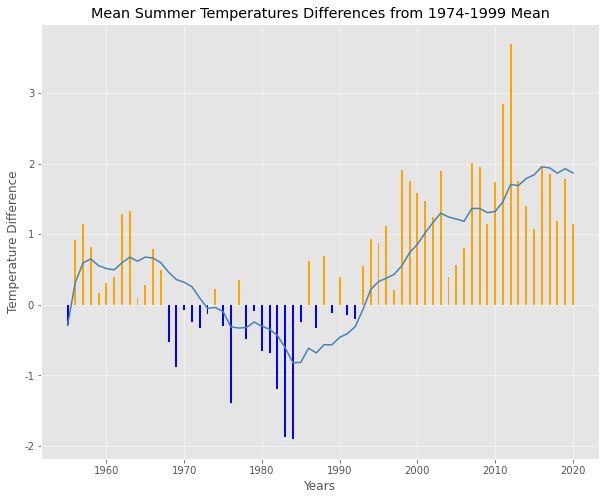

In [478]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Mean Summer Temperatures Differences from 1974-1999 Mean')
ax.set_xlabel('Years')
ax.set_ylabel('Temperature Difference')

colormat=np.where(grouped['TAVG']>baseline, 'orange','blue')
plt.bar(grouped.index, grouped.TAVG-baseline, color=colormat, width=0.25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.plot(grouped.Rolling_AVG-baseline, color = 'steelblue')
plt.grid(True, linewidth=0.5, color='white', linestyle='-', clip_on=False)


plt.show()

In the next step, a plot that shows the average monthly temperatures from 1955-2020 compared to the average monthly temperatures from 1974 to 1999



In [479]:
unioned_df['YEAR'] = unioned_df.DATE.dt.year
unioned_df['MONTH'] = unioned_df.DATE.dt.month
unioned_df['DAY'] = unioned_df.DATE.dt.day
unioned_df

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DAY
0,1955-01-01,0.000,14.165,18.33,10.00,1955,1,1
1,1955-01-02,2.032,10.830,14.44,7.22,1955,1,2
2,1955-01-03,0.000,12.500,15.56,9.44,1955,1,3
3,1955-01-04,0.000,13.055,18.89,7.22,1955,1,4
4,1955-01-05,0.000,13.055,17.78,8.33,1955,1,5
...,...,...,...,...,...,...,...,...
24099,2017-10-02,0.000,18.700,18.80,18.60,2017,10,2
24100,2017-10-08,0.000,17.800,17.90,17.70,2017,10,8
24101,2017-10-15,0.000,20.400,20.50,20.30,2017,10,15
24102,2017-10-27,0.000,17.800,17.90,17.70,2017,10,27


In order to create a rolling average that respects the months boundaries, (the 30 days should only count in the same month), first all the missing dates in the 1955-2020 interval will be found, and then filled with NA values. 3 dates are missing.

In [480]:
missing_dates_all = pd.date_range(start="1955-01-01", end="2020-12-31").difference(unioned_df.DATE)
missing_dates_all

DatetimeIndex(['2006-01-31', '2006-02-03', '2007-08-28'], dtype='datetime64[ns]', freq=None)

In [481]:
missing_dates_all = {'DATE': missing_dates_all, 'PRCP': math.nan, 'TAVG': math.nan, 'TMAX': math.nan, 'TMIN': math.nan}
missing_dates_all = pd.DataFrame(missing_dates_all)  
missing_dates_all['YEAR'] = missing_dates_all.DATE.dt.year
missing_dates_all['MONTH'] = missing_dates_all.DATE.dt.month
missing_dates_all['DAY'] = missing_dates_all.DATE.dt.day
unioned_df = pd.concat([unioned_df, missing_dates_all], ignore_index=True)
unioned_df = unioned_df.sort_values(['DATE'])
unioned_df

,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,DAY
0,1955-01-01,0.000,14.165,18.33,10.00,1955,1,1
1,1955-01-02,2.032,10.830,14.44,7.22,1955,1,2
2,1955-01-03,0.000,12.500,15.56,9.44,1955,1,3
3,1955-01-04,0.000,13.055,18.89,7.22,1955,1,4
4,1955-01-05,0.000,13.055,17.78,8.33,1955,1,5
...,...,...,...,...,...,...,...,...
23246,2020-12-27,0.000,16.670,NaN,NaN,2020,12,27
23247,2020-12-28,6.604,15.000,18.33,11.67,2020,12,28
23248,2020-12-29,0.000,16.110,20.00,12.22,2020,12,29
23249,2020-12-30,0.000,16.670,20.00,15.00,2020,12,30


In [482]:
#calculate the baseline for the average monthly temperature smoothed by a 30-day rolling average for the years 1974-1999
baseline2 = unioned_df.loc[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year <= 1999)]
baseline2 = baseline2[['MONTH','DAY','TAVG']].groupby(['MONTH','DAY']).mean()
baseline2 = baseline2.reset_index()
baseline2 = baseline2.rolling(window=30, min_periods = 1).mean()
baseline2 

,MONTH,DAY,TAVG
0,1.000000,1.0,10.363846
1,1.000000,1.5,10.534038
2,1.000000,2.0,10.427179
3,1.000000,2.5,10.218942
4,1.000000,3.0,10.166615
...,...,...,...
361,11.900000,15.5,11.620333
362,11.933333,15.5,11.528436
363,11.966667,15.5,11.450808
364,12.000000,15.5,11.410218


We can infere the below:
* The average monthly temperature seems to indeed have lower temperatures during winter and fall months, while they rise during spring and summer months
* Earlier years have lighter colors, while the most recent have darker. It can be observed that for almost all months, darker colors (more recent years) seem to be above the line showing the average temperatures throughout the months for the years 1974-1999. In fact, in some cases it can be observed that their difference is almost equal to 5 Celsius degrees (between July and August). At the same time, earlier years seem to be closer to the baseline throughtout all months, and most of them can be clearly observed below it.
* In other words, the average temperature is gradually increasing throughout the years for all months.

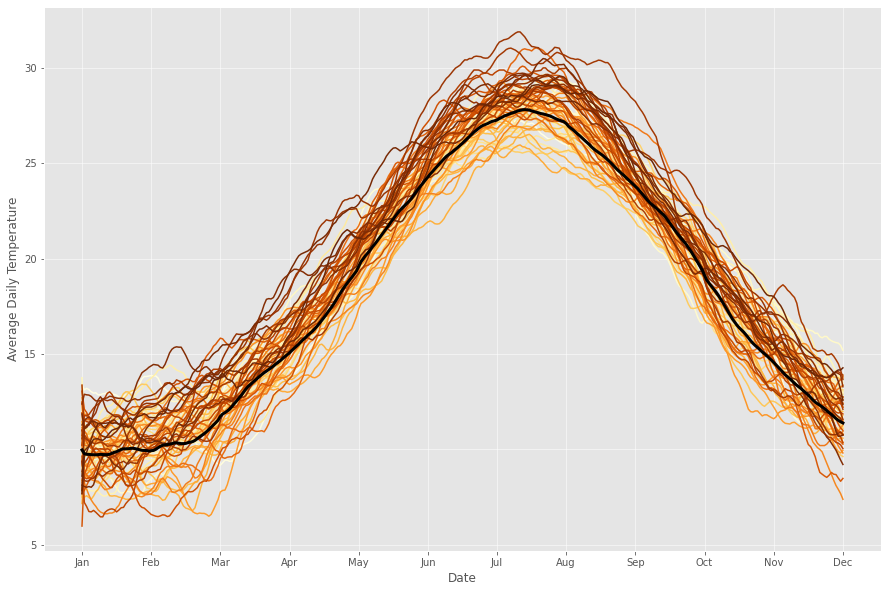

In [483]:
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] #the names of the months - labels
years = unioned_df.YEAR.unique() #all unique years of the dataframe
color = sns.color_palette('YlOrBr', 66) #all colors that will be used to color each year
# plot with seaborn and use the hue parameter to color distinct years
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))

for i in years: #an iteration for every year
    temp_df = unioned_df.loc[unioned_df.YEAR == i] #keep only the observations that are related to the year in the iteration
    temp_df = temp_df[['MONTH','DAY','TAVG']].groupby(['MONTH','DAY']).mean()
    temp_df = temp_df.reset_index()
    temp_df = temp_df.rolling(window=30, min_periods = 1).mean()
    ax = sns.lineplot(x=temp_df.MONTH, y=temp_df.TAVG, ci=None, color = color[i-years.min()])

ax.set(xlabel = 'Date', ylabel = 'Average Daily Temperature')
sns.lineplot(x=baseline2.MONTH, y=baseline2.TAVG, ci=None, color='black',linewidth = 3)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.grid(True, linewidth=0.5, color='white', linestyle='-', clip_on=False)

plt.show()

In the next step, a plot that shows the number of yearly extreme temperatures compared to the average number of those events will be created.



In [484]:
#creation of baseline
baseline3 = unioned_df.loc[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year <= 1999)]
baseline3 = baseline3.TAVG.mean()
baseline_events = unioned_df.loc[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year <= 1999)
                                     & (unioned_df.TMIN > (baseline3*1.1))]

baseline_events = Counter(baseline_events.YEAR)
baseline_avg_days = unioned_df.loc[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year <= 1999)]
baseline_avg_days = Counter(baseline_avg_days.YEAR)
baseline_events = {k: (baseline_events[k] / baseline_avg_days[k]) for k in baseline_events}
baseline_events = np.array(list(baseline_events.values())).mean()


baseline_events

0.25391381206561986

In [485]:
#creation of baseline for each single day of the year
daily_baseline_temps = unioned_df.loc[(unioned_df.DATE.dt.year >= 1974) & (unioned_df.DATE.dt.year <= 1999)]
daily_baseline_temps = daily_baseline_temps[['MONTH','DAY','TAVG']].groupby(['MONTH','DAY']).mean()
daily_baseline_temps = daily_baseline_temps.reset_index()
daily_baseline_temps.rename(columns={'TAVG':'Daily_Average_Baseline'}, inplace=True)

joined = pd.merge(daily_baseline_temps, unioned_df, how = 'inner', on = ('MONTH', 'DAY'))

joined

,MONTH,DAY,Daily_Average_Baseline,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
0,1,1,10.363846,1955-01-01,0.000,14.165,18.33,10.00,1955
1,1,1,10.363846,1956-01-01,0.000,16.385,18.33,14.44,1956
2,1,1,10.363846,1957-01-01,0.000,9.725,12.78,6.67,1957
3,1,1,10.363846,1958-01-01,0.000,12.220,17.78,7.78,1958
4,1,1,10.363846,1959-01-01,0.000,11.110,17.22,5.00,1959
...,...,...,...,...,...,...,...,...,...
24102,12,31,10.982692,2016-12-31,0.000,3.330,6.10,0.56,2016
24103,12,31,10.982692,2017-12-31,0.000,9.440,14.44,6.11,2017
24104,12,31,10.982692,2018-12-31,0.000,9.440,10.56,8.32,2018
24105,12,31,10.982692,2019-12-31,37.592,6.110,9.44,2.78,2019


In [486]:
#calculation of the ratio of yearly extreme events
yearly_extr_events = joined.loc[joined.TAVG > (joined.Daily_Average_Baseline*1.1)]
yearly_extr_events = Counter(yearly_extr_events.YEAR)
yearly_avg_days = Counter(joined.YEAR)

yearly_extr_events = {k: (yearly_extr_events[k] / yearly_avg_days[k]) for k in yearly_avg_days}
yearly_items = yearly_extr_events.items()
yearly_list = list(yearly_items)
yearly_extr_events = pd.DataFrame(yearly_list, columns = ['YEAR','EVENTS'])

yearly_extr_events

,YEAR,EVENTS
0,1955,0.353425
1,1956,0.322404
2,1957,0.306849
3,1958,0.364384
4,1959,0.263014
...,...,...
61,2016,0.437158
62,2017,0.457534
63,2018,0.463014
64,2019,0.449315


The below conclusions can be extracted:
* From 1955 to 1971 most years had a number of extreme temperatures above the average, which means that these years were hotter in comparison to the baseline of 1974-1999
* From 1969 to 1994 and for most of those years there's a pattern where one year has a number of extreme events greater than the average, followed by a year with less of those events. So one could deduce that there was a balance, since none of those years had a significant deviation from the baseline.
* After 1994, almost all years (with one exception) have a number of extreme temperatures greater than the average. In fact, after 2005 a constantly increasing pattern can be clearly observed.

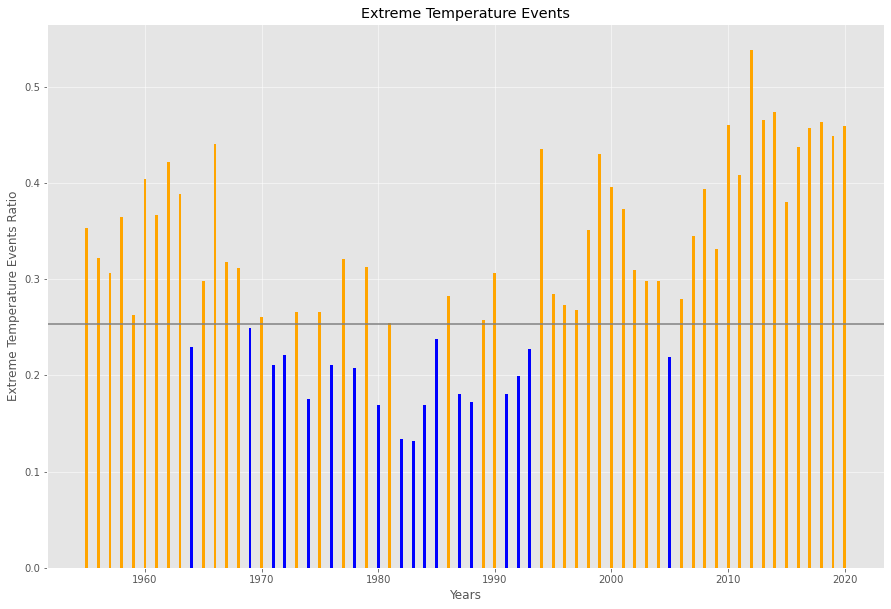

In [487]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Extreme Temperature Events')
ax.set_xlabel('Years')
ax.set_ylabel('Extreme Temperature Events Ratio')
plt.style.use('ggplot')

colormat1=np.where(yearly_extr_events['EVENTS']>baseline_events, 'orange','blue')
plt.bar(yearly_extr_events.YEAR, yearly_extr_events.EVENTS, color=colormat1, width=0.25)
plt.axhline(y=baseline_events, color='grey', linestyle='-')
plt.grid(True, linewidth=0.5, color='white', linestyle='-', clip_on=False)


plt.show()

Finally, a plot that shows the yearly rainfall compared to its correpsonding 10-year rolling average.

In [488]:
#count of the rainfall yearly ratio
rainfall = unioned_df[['PRCP','YEAR']].groupby(['YEAR']).sum()

rainy_days = unioned_df[unioned_df.PRCP > 0]
rainy_days = rainy_days[['YEAR','PRCP']]
rainy_days = Counter(rainy_days.YEAR)

yearly_rain = rainy_days.items()
rain_list = list(yearly_rain)
rainy_days= pd.DataFrame(rain_list, columns = ['YEAR','PRCP'])
rainy_days = rainy_days.set_index('YEAR')

rain_vol = rainfall/rainy_days
rain_vol


,PRCP
YEAR,
1955,8.169701
1956,5.628640
1957,4.583545
1958,5.388708
1959,3.752070
...,...
2016,6.222190
2017,6.341583
2018,6.916764


In [489]:
#calculation of the 10-year rolling average of the volume
roll_avg_prcp = rain_vol.rolling(window=10, min_periods = 1).mean()
roll_avg_prcp

,PRCP
YEAR,
1955,8.169701
1956,6.899171
1957,6.127296
1958,5.942649
1959,5.504533
...,...
2016,6.542168
2017,6.620457
2018,6.766811


The below conclusions can be extracted:
* The year 1955 had the greates rainfall to rainy days ratio for almost 30 years. 
* From 1955 to 2020 a clear pattern can be observed where the ratio keeps increasing slowly over the years
* The years that were on average the most dry, are 1959 and 2000, while the year with the by-far greatest ratio is 2005, followed by the year 2019.

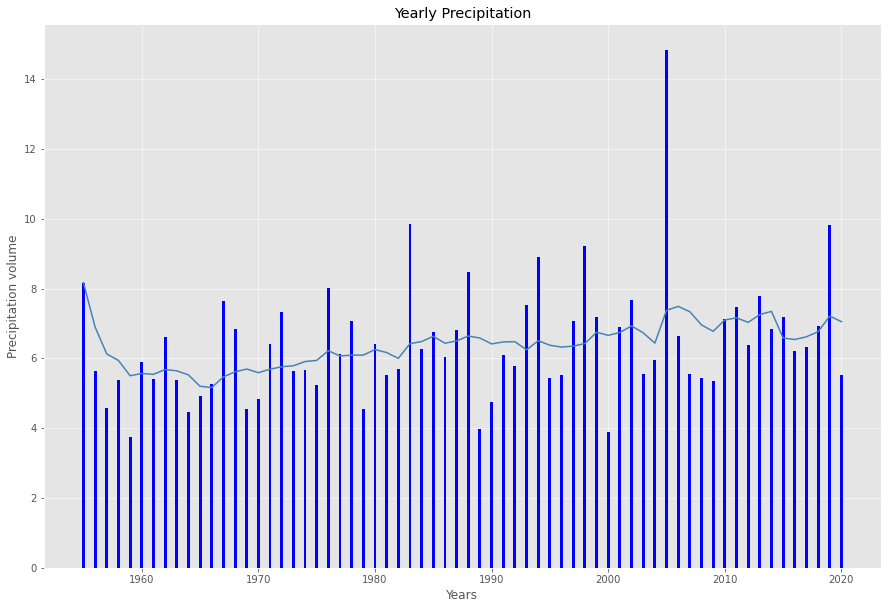

In [490]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Yearly Precipitation')
ax.set_xlabel('Years')
ax.set_ylabel('Precipitation volume')
plt.style.use('ggplot')

plt.bar(rain_vol.index, rain_vol.PRCP,  width=0.25, color = 'blue')
plt.grid(True, linewidth=0.5, color='white', linestyle='-', clip_on=False)
plt.plot(roll_avg_prcp, color = 'steelblue')


plt.show()